In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
import numpy as np
import pickle
from sklearn import preprocessing

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

enc = preprocessing.OneHotEncoder()
enc.fit(y_train)
y_train = enc.transform(y_train).toarray()

print (x_train.shape)
print (y_train)
print (x_test.shape)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
(50000, 32, 32, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(10000, 32, 32, 3)


In [2]:
# from tensorflow.keras.models import load_model

# feature_extractor = load_model('model-features/features.h5')
# # feature_encoder = load_model('ae-encoder.h5')
# print ("Models loaded!")

Models loaded!


In [3]:
# features = feature_extractor.predict(x_test)
# print (features.shape)

(10000, 10)


In [4]:
# vectors = feature_encoder.predict(features)
# print (vectors.shape)

(50000, 32)


In [4]:
# pickle_out = open("model-features/cbir-resnet-features-test.pickle", "wb")
# pickle.dump(features, pickle_out)
# pickle_out.close()
# print("features saved!")

features saved!


In [3]:
# kalo udah ada pickle nya

pickle_in = open("pickle-test/cbir-resnet-features-test.pickle", "rb")
vectors = pickle.load(pickle_in)

In [4]:

# print (features[1])
print (vectors[1])

[4.0981863e-04 1.5905555e-01 5.7088863e-07 7.3525626e-07 2.5536480e-08
 8.5081871e-07 1.8868786e-06 1.2019126e-08 8.4052807e-01 2.4957826e-06]


In [5]:
import numpy as np
from annoy import AnnoyIndex

index = AnnoyIndex(vectors.shape[1], metric='angular')
for i in range(vectors.shape[0]):
    index.add_item(i, vectors[i,:].tolist())

In [6]:
index.build(20)
# index.save("index-features.ann")

True

In [7]:
from collections import Counter
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(y_train[0:10])
print(y_test.flatten())
lookup = np.argmax(y_train[:, :], axis=1)
lookup_test = y_test.flatten()
print(lookup)
print(lookup_test)
print(Counter(lookup_test))

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[3 8 8 ... 5 1 7]
[6 9 9 ... 9 1 1]
[3 8 8 ... 5 1 7]
Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})


Querying with this random image
8957


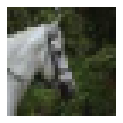

horse


In [11]:
import random
choice_idx = random.randrange(10000)
# choice_idx = 6775
# airplane (bird) = 6775
# cat = 3298
# horse = 8957
# results = index.get_nns_by_item(choice_idx, 6000)
results = index.get_nns_by_vector(vectors[choice_idx], 1000)

print ("Querying with this random image")
print(choice_idx)

import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_test[choice_idx])
plt.axis('off')
plt.show()
print (labels[lookup_test[choice_idx]])
# print (lookup[choice_idx])

Search results:


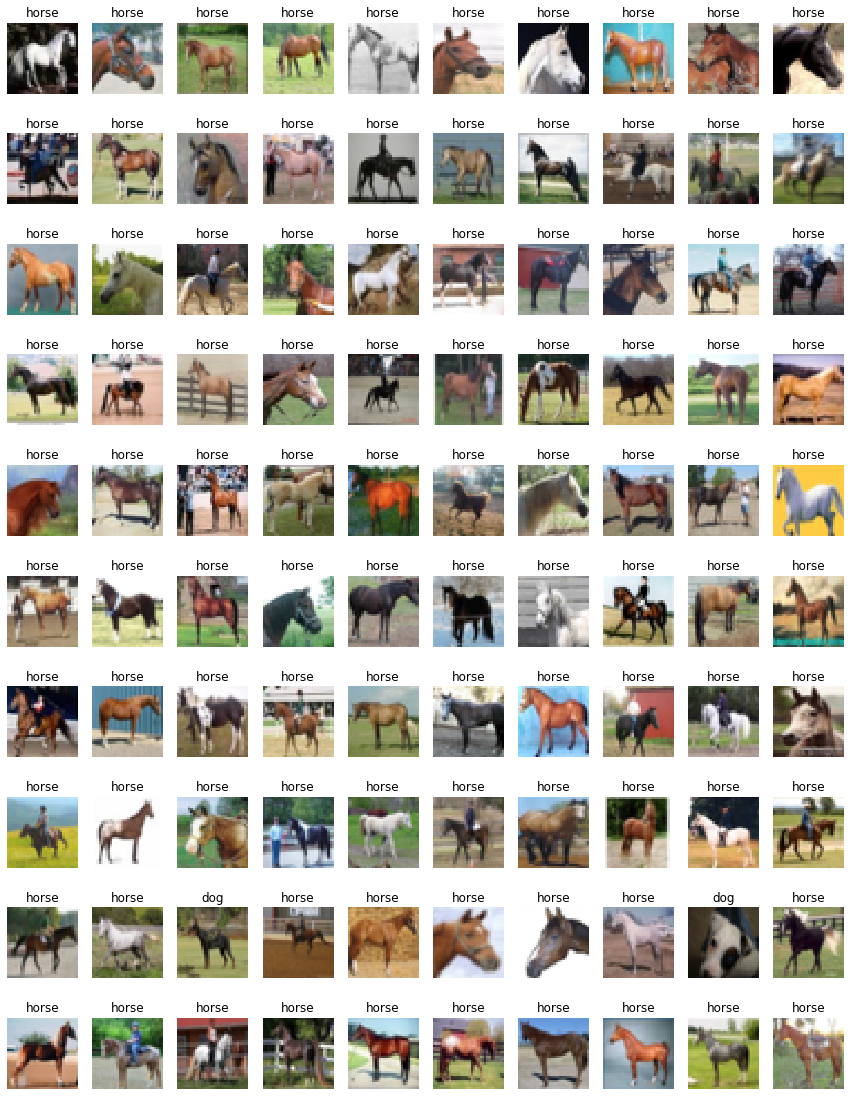

In [12]:
import matplotlib.pyplot as plt


print ("Search results:")

w=10
h=10
fig=plt.figure(figsize=(15,20))
columns = 10
rows = 10
for i in range(100):
#     ax = plt.subplot(5, 100, i+1)
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(x_test[results[i]])
    plt.title(str(labels[lookup_test[results[i]]]))
    plt.axis('off')
plt.show()

In [10]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
t = np.ones(1000).astype(float)
p = np.array([lookup_test[x] == lookup_test[choice_idx] for x in results]).astype(float)

print ("F1 Score for this search:", f1_score(t, p))
print ("Accuracy Score for this search:", accuracy_score(t, p))
print ("Precision Score for this search:", precision_score(t, p))
print ("Recall Score for this search:", recall_score(t, p))

F1 Score for this search: 0.8378849506101104
Accuracy Score for this search: 0.721
Precision Score for this search: 1.0
Recall Score for this search: 0.721
